<a href="https://colab.research.google.com/github/meenubenny/Airline_Passenger_Referral_Prediction/blob/main/MeenuBenny_Airline_Passenger_Referral_Prediction_capston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Airline passenger referral prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Meenu Benny
##### **Team Member 2 -** - Thasniya Mansoora
##### **Team Member 3 -** - T. Ompriya Subudhi


# **Project Summary -**

The Airline passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to remain in the global market competition. Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort, their trip distance, route they have travelled, timing, the airline frequency, ground service etc. on the basis of which sentiment reviews are analysed and machine learning model on classification is prepared which helps airline industries to focus on the factor resolving which it can actually help them in business growth better than the competitors

# **GitHub Link -**

https://github.com/meenubenny/Airline_Passenger_Referral_Prediction

# **Problem Statement**


Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd 
import numpy as np
from datetime import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import datetime as dt


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb 


In [4]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [5]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [6]:
# Load Dataset
# Reading the xlsx file from the drive
df = pd.read_excel('/content/drive/MyDrive/Alma Better/capstone project/CLASSIFICATION/data_airline_reviews.xlsx')


### Dataset First View

In [7]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
value = len(df[df.duplicated()])
value

70711

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().sum()
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

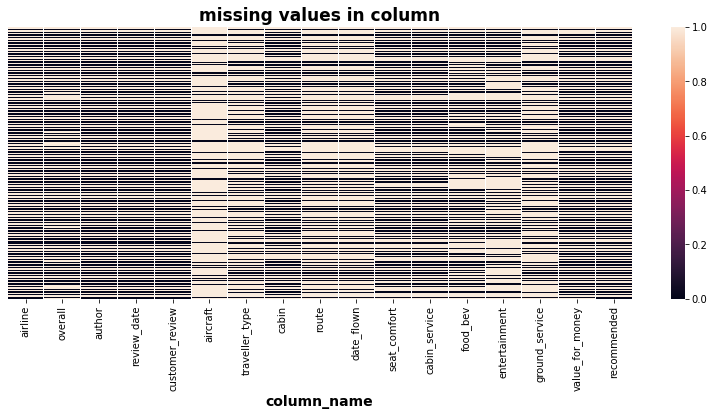

In [12]:
# Visualizing the missing values
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [13]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
# droping the rows which have all values as NaN
df.dropna(how='all',inplace=True)

### What did you know about your dataset?

We can see that there are 131895 rows and 17 columns. Also we can see that there are 7 float type feature and 10 object type features. Dataset provided has a lot of missing values, in total we have 1783 overall data missing, 1 - author/review date/customer review, 42696 missing for type of aircraft, 23644 missing for traveller type, 2479 missing for cabin, 23671 missing route, 23750 missing for date flown, 4973 missing for seat comfort, 4944 missing for cabin service, 12843 missing for food beverages, 20954 missing for entertainment, 24015 missing for ground service, 1857 missing for value for money, 1423 missing for recommended.



## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ***Variables Description*** 

There are 17 variables in the dataset,

*   **airline**: Name of the airline.

*   **overall**: Overall point is given to the trip between 1 to 10.

*   **author**: Author of the trip

*   **reviewdate**: Date of the customer Review 

*   **review**: Review of the customers in free text format

*   **aircraft**: Type of the aircraft

*   **travellertype**: Type of traveler (e.g. business, leisure)

*   **cabin**: type of cabin economy/business/first class

*   **route**: route of flight

*   **date flown**: date of the flight

*   **seatcomfort**: Rated between 1-5

*   **cabin service**: Rated between 1-5

*   **foodbev**: Rated between 1-5

*   **entertainment**: ratings for entertainment between 1-5 

*   **groundservice**: Rated between 1-5

*   **valueformoney**: Rated between 1-5

*   **recommended**: - yes or no

In [17]:
# Check Unique Values for each variable.
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64


###There are 81 unique airlines in the data 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
value = len(df[df.duplicated()])
value

0

In [19]:
df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [20]:
#Droping rows with null values in entire row 
df.dropna(how='all',inplace=True) 

In [21]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


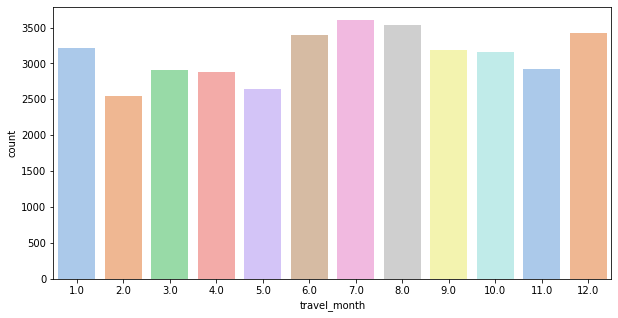

In [22]:
#Changing date_flown to Datetime object
df['date_flown'] = df['date_flown'].apply(lambda x:pd.to_datetime(x))

# Create a column 'travel_month' to identify in which month the passengers travel
df['travel_month'] = df['date_flown'].dt.month

# Visualize the count of travel month
plt.figure(figsize=(10,5))
sns.countplot(df['travel_month'], color ='m',palette = 'pastel')
plt.show()



July is the most active month for flights. This could be due to factors such as seasonal demand (e.g., higher demand for vacation travel), or events that drive travel (e.g., festivals or conferences).

February is the most un-occupied month for flights.  This could be due to seasonal factors (e.g., colder weather or holidays) or other events that affect travel demand

### What all manipulations have you done and insights you found?

First we adjusted the datetime using lambda function and created a bar chart of travel month for month wise comparison. The statistics we found show that February has the least number of flights, July has the most flights followed by August and December.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [40]:
# Chart - 1 visualization code
top_airline = df['airline'].value_counts()[0:5] # to get the name and count of top 5 airlines
top_airline

Spirit Airlines      2871
American Airlines    2846
United Airlines      2774
British Airways      2731
Emirates             1763
Name: airline, dtype: int64

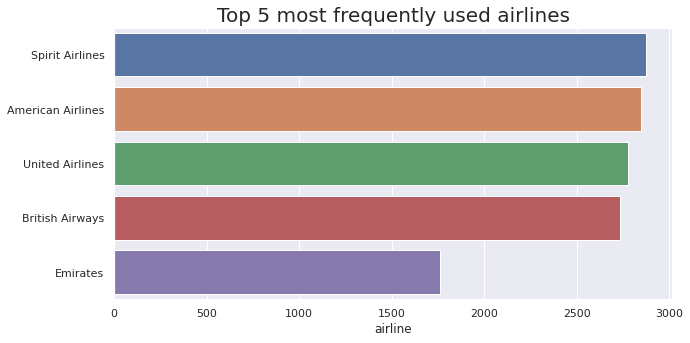

In [41]:
# Visualize the top 5 most frequently used airlines 
plt.figure(figsize=(10,5))
graph=sns.barplot(x=top_airline,y=top_airline.index,data=df)
graph.set_title('Top 5 most frequently used airlines', fontsize = 20);
plt.show()

In [42]:
bottom_airline = df['airline'].value_counts()[-5:] # to get the name and count of bottom 5 airlines
bottom_airline

QantasLink            104
Adria Airways          85
Air Arabia             80
Tunisair               71
Thai Smile Airways     48
Name: airline, dtype: int64

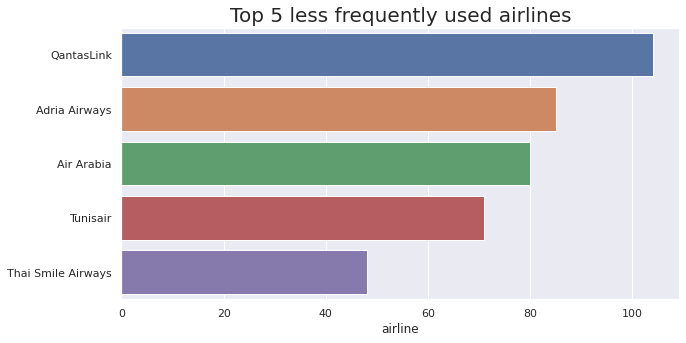

In [43]:
# Visualize the 5 less frequently used airlines 
plt.figure(figsize=(10,5))
graph=sns.barplot(x=bottom_airline,y=bottom_airline.index,data=df)
graph.set_title('Top 5 less frequently used airlines', fontsize = 20);
plt.show()

##### 1. Why did you pick the specific chart?

Barplot is a univariate plot which is great to show different observations of single feature and the above diagram is chosen for comparison of different airlines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Looking at the diagram, we can say that Spirit airlines has the most number of  flights followed by American Aircraft and Thai smile airways has the least number of flights.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Spirit Airlines has the most number of flights. It may be rated as one of the safest airlines in the world. Maybe that's why more people chose Spirit Airlines.

Thai smile airways has a lower number of flights compared to other airlines. This could be due to a variety of reasons, such as lower demand for flights to the destinations served by the airline, or higher competition from other carriers.

#### Chart - 2

In [44]:
# Chart - 2 visualization code
top_aircraft = df['aircraft'].value_counts()[0:5] # to get the name and count of top 5 aircrafts
top_aircraft

A320              2130
A380              1109
Boeing 777        1101
Boeing 737-800    1021
A330               974
Name: aircraft, dtype: int64

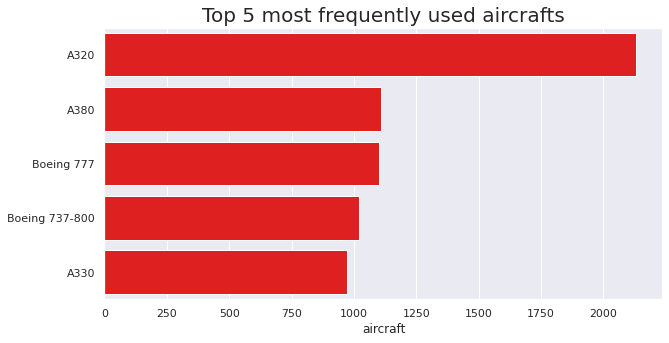

In [45]:
# Visualize the most frequent aircraft
plt.figure(figsize=(10,5))
graph=sns.barplot(x=top_aircraft,y=top_aircraft.index,data=df, color='red')
graph.set_title('Top 5 most frequently used aircrafts', fontsize = 20);
plt.show()

##### 1. Why did you pick the specific chart?

Barplot is a univariate plot which is great to show different observations of single feature.
The above chart shows overall YES recommendation with 5 different types of aircrafts

##### 2. What is/are the insight(s) found from the chart?

There are 5 types of aircrafts 1. A320 2.Boeing 777 3. A380 4. A330 5. Boeing 737-800 A320 has highest rating, Boeing 777 has second, A380 third, A330 fourth, Boeing 737-800 fifth.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The A320 has the most impressive rating of the bunch. It will prove that it is especially highly respected by clients and that it provides a high level of comfort, relief and unwavering quality.

Assessments of other aircraft in the gathering fell in direct fashion, with the A380 having the second most impressive rating, following the Boeing 777, A330 and Boeing 737-800. This will demonstrate that there are discrepancies in the quality or performance of these aircraft and that clients perceive these differences.

To make a positive business impact, it is very important that carriers and other travel suppliers consider the evaluations of the aircraft they use and choose an aircraft that is highly respected by clients and offers a high level of comfort and uncompromising quality. This may involve putting resources into new or more existing aircraft, or implementing procedures to maintain and redesign existing aircraft. It can also be useful to look for client critiques and use this to illuminate progressive upgrades to the aircraft and general travel insight.

#### Chart - 3

In [46]:
# Chart - 3 visualization code
top_flown_route = df['route'].value_counts()[0:5] # to get the name and count of top 5 flown route
top_flown_route

BKK to LHR               31
LHR to JFK               30
Vancouver to Toronto     28
LHR to BKK               27
Guangzhou to New York    26
Name: route, dtype: int64

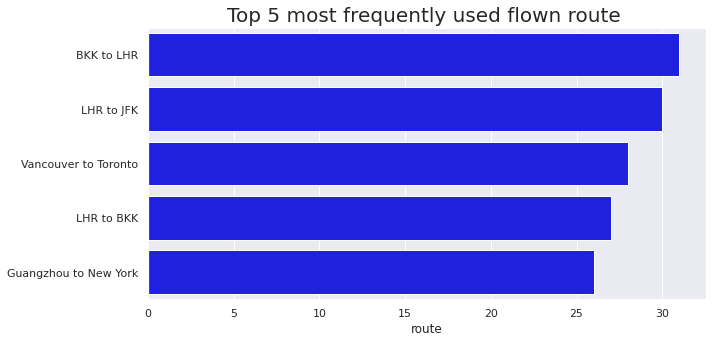

In [47]:
# Visualize the top 5 most flown route
plt.figure(figsize=(10,5))
graph=sns.barplot(x=top_flown_route ,y=top_flown_route .index,data=df,color='blue')
graph.set_title('Top 5 most frequently used flown route ', fontsize = 20);
plt.show()

##### 1. Why did you pick the specific chart?

Barplot is a univariate plot which is great to show different observations of single feature.
The above chart was picked for comparsion of the most frequently used flown route of various airlines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, we have observed that the top 5 most flown route are-
BKK to LHR, LHR to JKF, Vancover to Toronto, LHR to BKK and Guangzhou to New York.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

BKK to LHR is the most frequently used flown route, The reason may be the shorter drive or more the route connecting denser cities.  

#### Chart - 4

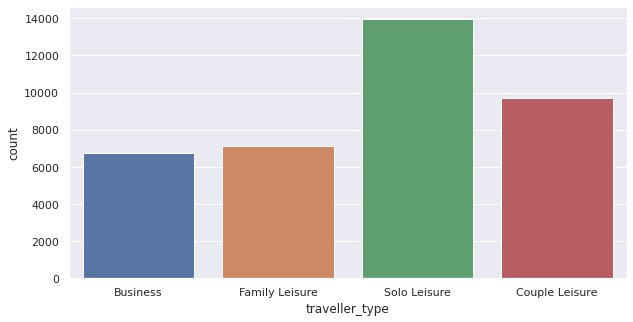

In [48]:
# Chart - 3 visualization code
# Visualize the count of traveller type
plt.figure(figsize=(10,5))
sns.countplot(df['traveller_type'])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable
The above chart is showing count comparison of various type of travellers.

##### 2. What is/are the insight(s) found from the chart?

There are major 4 types of travellers, Solo Leisure travellers are the highest followed by Couple Leisure, Family Leisure and Business

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Solo leisure travelers represent the largest consumer segment. This suggests that there is strong demand for travel experiences for individual travelers and that airlines and other travel providers should focus on meeting the needs of this customer group.

Business travelers are an important part of the market. This indicates that there is a demand for convenient and efficient travel options for business purposes and airlines and other travel providers should focus on meeting the needs of this customer group.

Family leisure and couples leisure are a significant part of the market. This suggests that there is a demand for travel experiences for families or couples and that airlines and other travel providers should focus on meeting the needs of these customer groups.

#### Chart - 5

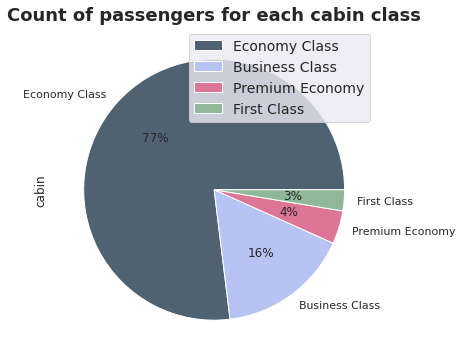

In [49]:
# Chart - 5 visualization code
# Visualize the count of passengers for each cabin class
# Try to create a pie chart for visualization
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),colors=colors)
plt.title("Count of passengers for each cabin class",fontsize=18,fontweight='bold') #showing graph title
plt.legend(fontsize=14) #show legend
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart helps organize and show data as percentage of whole, True to the name this kind ofvisulization uses a circle to represents the whole, and slices of that cirlce or pie to reprents the specific categories that compose the whole.

The above chart is a pie chart showing percentage comparison of the cabin type preferred.

##### 2. What is/are the insight(s) found from the chart?

77% of passengers chose to fly in economy class as this category fare is lesser.
16% chose to fly by business class. premium economy at 4.4% and first class at 2.6%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most clients prefer economy class travel. This suggests that there is a strong interest in spending well-utilized travel choices and that airlines and other travel providers should focus on meeting the needs of this customer segment.

Business class and premium economy address a large portion of the market, showing interest in more upscale travel experiences. This is an opportunity for airlines and other travel providers to differentiate their offerings and capture a larger share of the market.

First class represents a small portion of the market. This could indicate that there is limited demand for high-end travel experiences, or that there is strong competition in this segment.

Airlines could offer a range of travel classes at different price points, or focusing on specific customer segments (e.g., business travelers or families) to differentiate the business and capture a larger share of the market.

#### Chart - 6

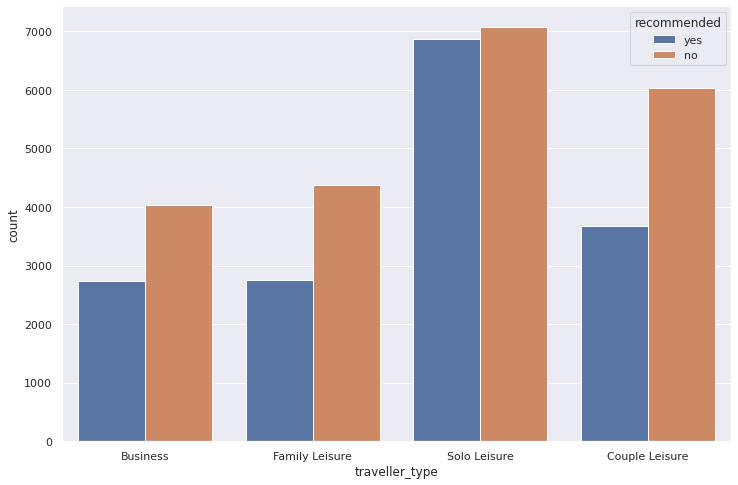

In [52]:
# Chart - 6 visualization code
# Visulization to check recommendtion pattern in traveller_types
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(df['traveller_type'],hue='recommended',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable.
The above chart compares Yes or No recommendation given by the different type of travellers.

##### 2. What is/are the insight(s) found from the chart?

The No recommendation is highest for all the types of travellers the differences for solo leisure is least, and couple leisure is highest

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This could indicate that there is an opportunity for the business to improve its offerings and better meet the needs of its customers. To create a positive business impact, it may be necessary to examine the reasons why customers are not recommending the business, and to identify areas for improvement. This could involve analyzing customer feedback, examining competitors, and implementing strategies to differentiate the business and improve its offerings.

#### Chart - 7

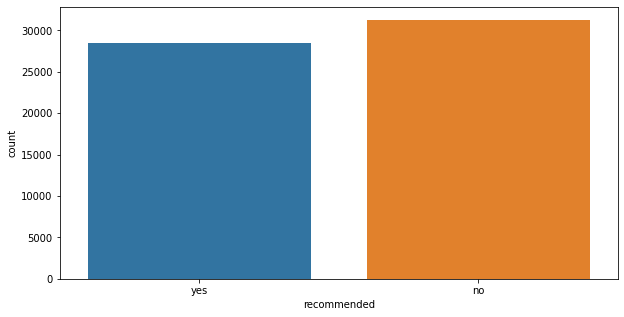

In [29]:
# Chart - 7 visualization code
# Visualize the count of class in recommended feature
plt.figure(figsize=(10,5))
sns.countplot(df['recommended'])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable.
The above chart shows recommendation comparison of YES and NO

##### 2. What is/are the insight(s) found from the chart?

Count YES recommendation is below 30000 and count of NO is above 30000

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will demonstrate that there is room for improvement in terms of customer loyalty and loyalty.

In order to make a positive business impact, it is important to identify the variables that keep clients from prescribing business and implement techniques to address these issues and further develop the client experience. This may include dissecting client criticism, looking at competitors, and implementing new strategies or methodologies to solve clients' problems. This can be useful for zero in differentiating the business and offering better items or administrations that surpass client assumptions.

It is important to note that these experiences rely on a limited amount of data, and additional information and testing is expected to make more comprehensive assumptions about a business's performance or development potential.

#### Chart - 8

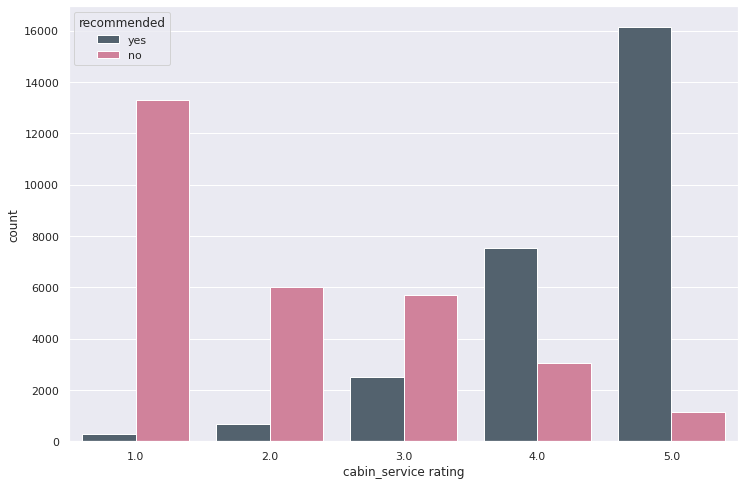

In [55]:
# Chart - 8 visualization code
# Visualization to check is cabin service score a determinant of recommendation
plt.figure(figsize=(12,8))
sns.countplot(df['cabin_service'],hue='recommended',data=df,palette=['#4F6272','#DD7596'])
plt.xlabel('cabin_service rating')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable
This above bar chart shows comparison between recommended YES and NO with cabin service rating

##### 2. What is/are the insight(s) found from the chart?

Travelers rated 1 for cabin service with the highest NO suggestion followed by 2 and 3 ratings and 5 being the highest YES suggestion.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are few possible knowledge that can be gleaned from this data:

Poor ratings for cabin service are related to the high rate of not recommending the airline. This suggests that the nature of cabin service0 is an important variable for clients and further developing lodge administration affects customer loyalty and stability.

Higher ratings for cabin service are associated with a higher rate of recommending the airline. This suggests that providing high-quality cabin service is an important factor for customers, and that this can contribute to customer satisfaction and loyalty.

To create a positive business impact, it may be necessary to focus on improving the quality of cabin service and addressing any issues that are causing customers to rate the service poorly. This could involve training staff, implementing new policies or procedures, or investing in new equipment or amenities. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to cabin service.


#### Chart - 9

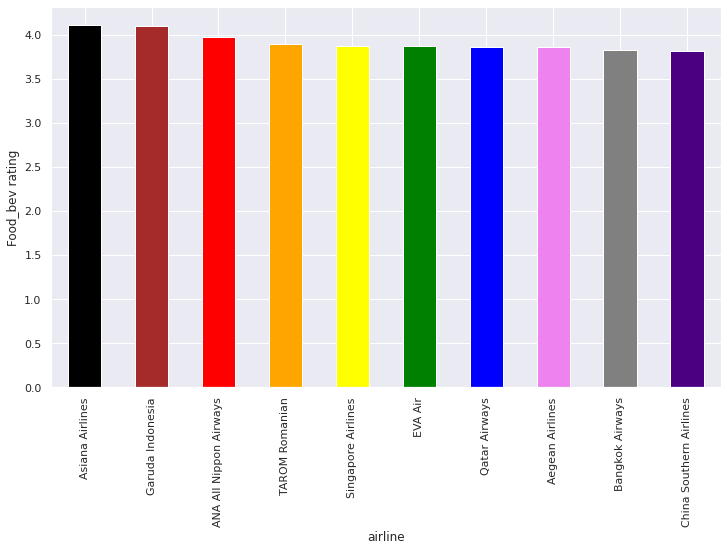

In [63]:
# Chart - 9 visualization code
# Top airlines which lead in food_bev segment
plt.rcParams['figure.figsize'] = (12, 7)
df.groupby(['airline'])['food_bev'].mean().sort_values(ascending=False).head(10).plot.bar(color = ['black','brown','red','orange','yellow','green','blue','violet','grey','indigo'])
plt.ylabel('Food_bev rating')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart was picked for comparsion of the ratings of food and beverages various airlines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Food and beverages wise Asiana and Garuda airlines have the highest rating, ANA all Nippon Airways has second and the lowest ratings are for Bangkok and China Southern Airlines.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

Asiana and Garuda airlines have a strong reputation for the quality of their food and beverages. This could contribute to customer satisfaction and loyalty, and may help these airlines to attract new customers.

ANA All Nippon Airways has a good reputation for food and beverages, but ranks lower than Asiana and Garuda. This could indicate that the airline has room for improvement in this area, and focusing on enhancing the quality of its food and beverages could be a potential growth opportunity.

Bangkok and China Southern Airlines have lower ratings for food and beverages compared to other airlines. This could be a cause for concern, as poor quality in this area could lead to customer dissatisfaction and potentially harm the reputation of the airline. Improving the quality of food and beverages could be an important focus for these airlines in order to improve customer satisfaction and maintain competitive advantage.

#### Chart - 10

In [32]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [33]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

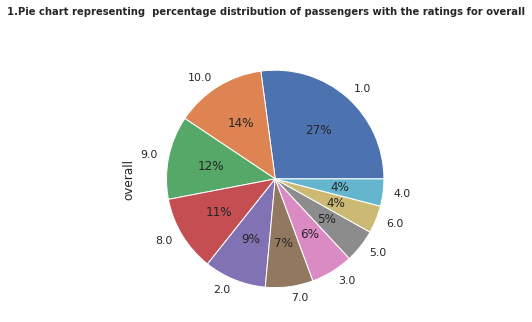

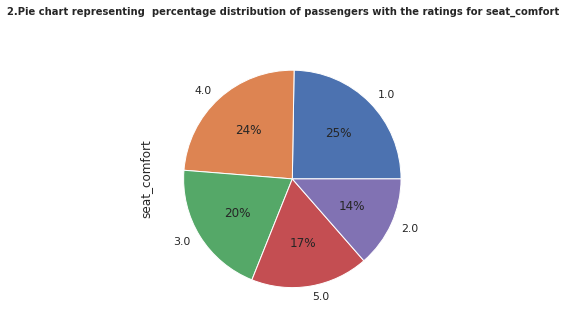

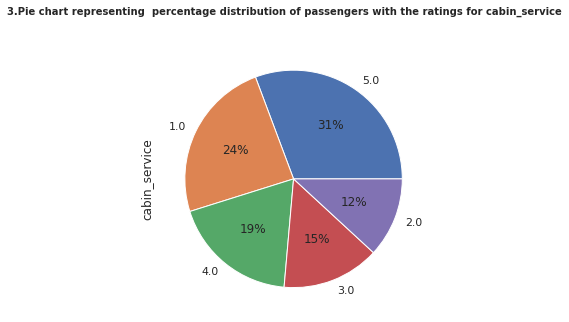

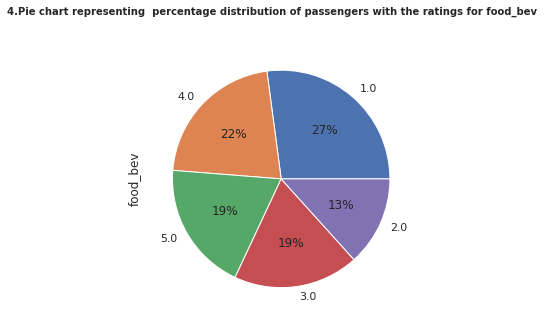

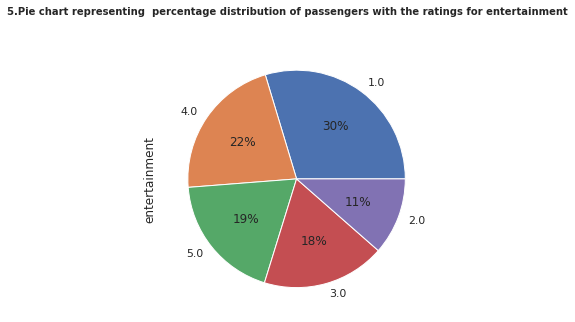

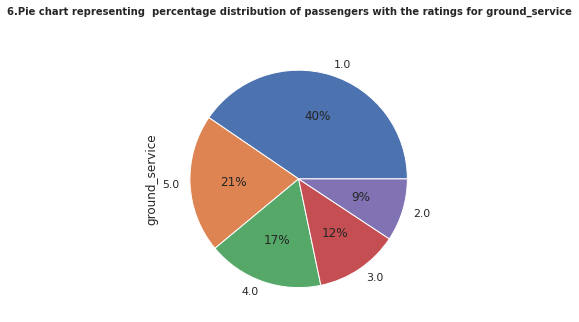

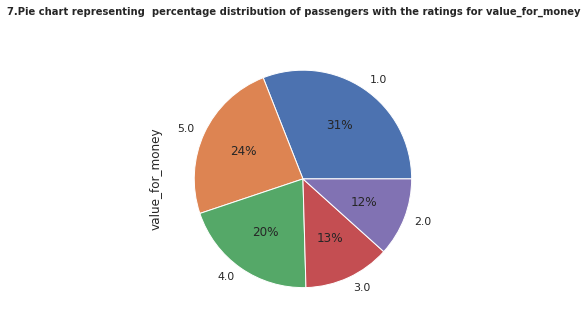

In [58]:
# Chart - 12 visualization code
# Visualize the percentage distribution of passengers with the ratings for all numerical features
a = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']
for i in a: 
  fig = plt.figure(figsize=(10, 5))
  df[i].value_counts().plot(kind='pie',autopct='%1.0f%%')
  plt.suptitle(f'{a.index(i)+1}.Pie chart representing  percentage distribution of passengers with the ratings for {i}',fontsize=10,fontweight='bold')
  plt.show()

##### 1. Why did you pick the specific chart?

Pie chart helps organize and show data as percentage of whole, True to the name this kind ofvisulization uses a circle to represents the whole, and slices of that cirlce or pie to reprents the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

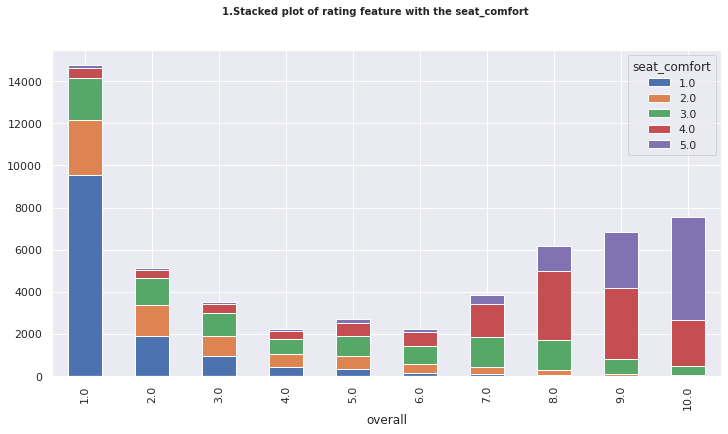

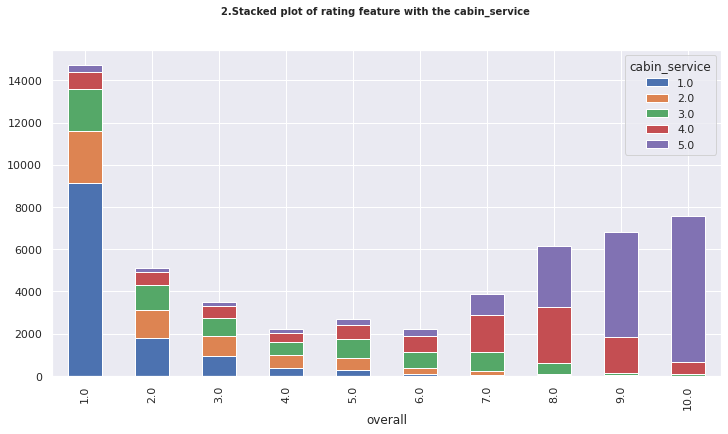

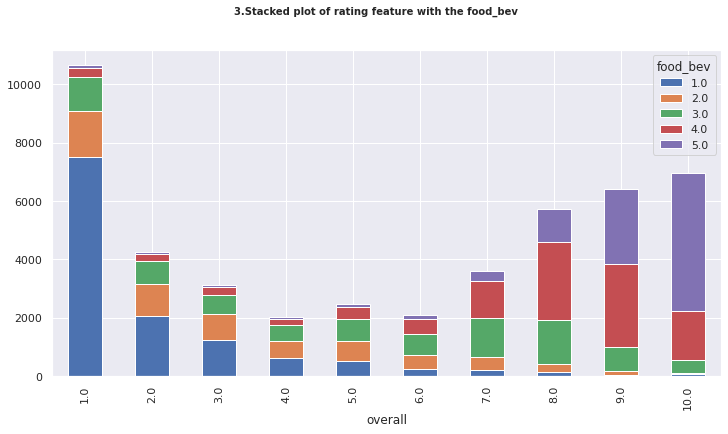

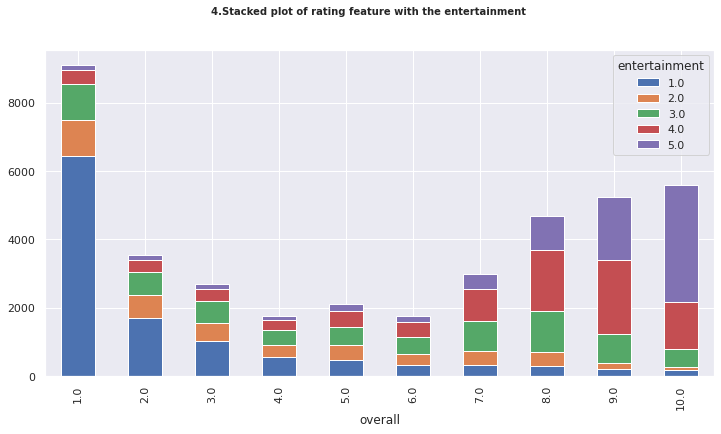

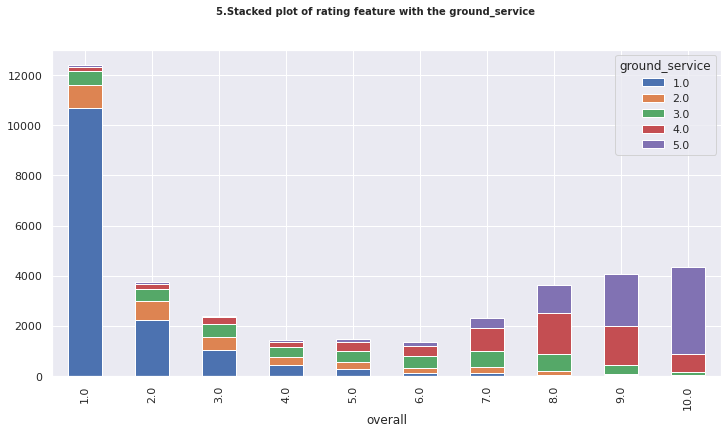

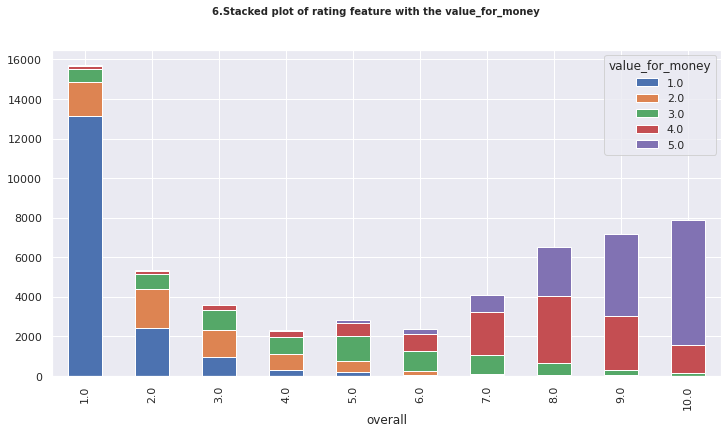

In [59]:
# Chart - 13 visualization code
# Get Stacked plot of rating features
a = ['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money'] #review_features
for i in a: 
  x = df.groupby([df['overall']])
  x[i].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))
  plt.suptitle(f'{a.index(i)+1}.Stacked plot of rating feature with the {i}',fontsize=10,fontweight='bold')
  plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

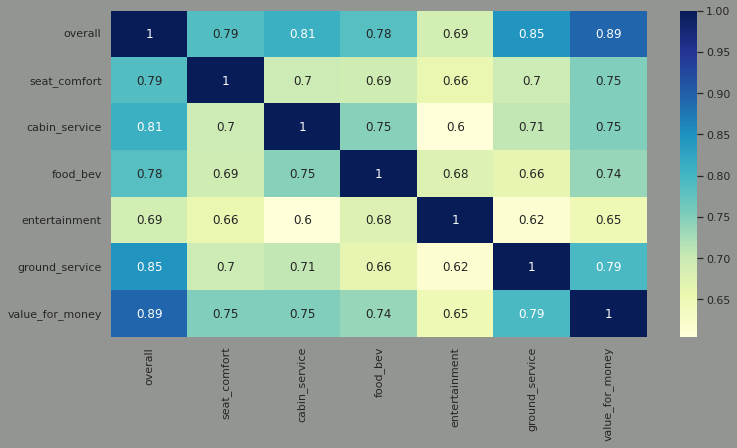

In [70]:
# Get correlation mtarix on different rating features
cor_matrix =abs(df.drop('travel_month',axis=1).corr())
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6),edgecolor='k',facecolor='xkcd:grey')
sns.heatmap(cor_matrix,annot = True, cmap='YlGnBu',)
plt.show()



##### 1. Why did you pick the specific chart?

Correlation matrix is a table showing correlation coefficients between variables. each cell in the table shows the correlation between two variable, a correlation map used to summarize the data as input into more advanced analysis and dignostic for advanced analysis.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above heatmap "overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important from above heatmap

#### Chart - 15 - Pair Plot 

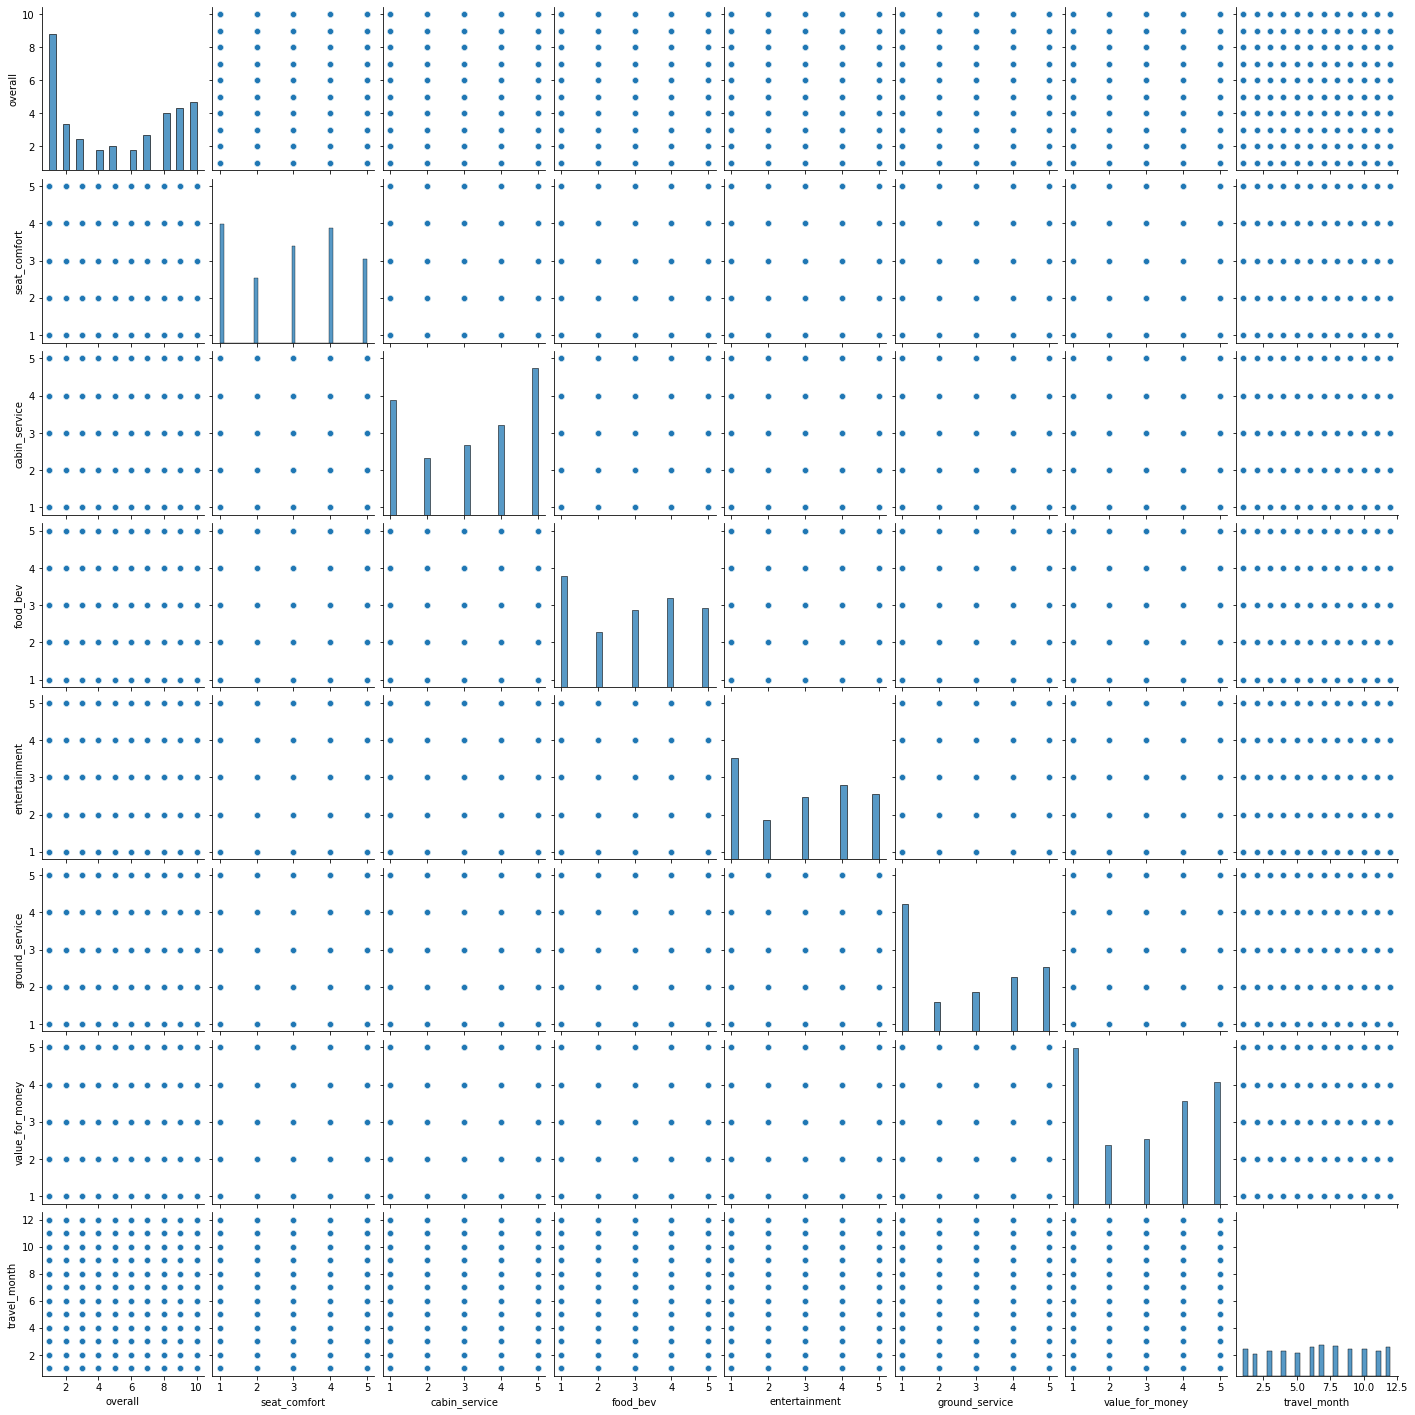

In [37]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplpot is used to understand set features to explain relationship between two variables or to form the most separated clusters, it is also helps to form some simple classification models by drawing some simple line or make linear separation in our data-set. I used pairplot to analyse the patterns of data and relationship between features, its exactly same as coorealtion map but here you will get graphical representation.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above heatmap "overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [74]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
aircraft           0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
travel_month       0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
# Features with over 50% of its observations missings will be removed and features whhich are not important
df = df.drop(['aircraft','travel_month','route','review_date','date_flown','author'],axis = 1)

In [78]:
numerical_df = df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [79]:
# Filling numerical features null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

In [80]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13189 entries, 0 to 13188
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          13189 non-null  float64
 1   seat_comfort     13189 non-null  float64
 2   cabin_service    13189 non-null  float64
 3   food_bev         13189 non-null  float64
 4   entertainment    13189 non-null  float64
 5   ground_service   13189 non-null  float64
 6   value_for_money  13189 non-null  float64
dtypes: float64(7)
memory usage: 721.4 KB


In [82]:
cat_df = df.drop(columns=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [83]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13189 entries, 7 to 131712
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          13189 non-null  object
 1   customer_review  13189 non-null  object
 2   traveller_type   13189 non-null  object
 3   cabin            13189 non-null  object
 4   recommended      13189 non-null  object
dtypes: object(5)
memory usage: 618.2+ KB


In [86]:
new_df = pd.concat([cat_df.reset_index(),numerical_df.reset_index()], axis =1)

In [87]:
new_df.drop(columns='index',inplace=True,axis=1)

In [94]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13189 entries, 0 to 13188
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            13189 non-null  int64  
 1   airline          13189 non-null  object 
 2   customer_review  13189 non-null  object 
 3   traveller_type   13189 non-null  object 
 4   cabin            13189 non-null  object 
 5   recommended      13189 non-null  object 
 6   index            13189 non-null  int64  
 7   overall          13189 non-null  float64
 8   seat_comfort     13189 non-null  float64
 9   cabin_service    13189 non-null  float64
 10  food_bev         13189 non-null  float64
 11  entertainment    13189 non-null  float64
 12  ground_service   13189 non-null  float64
 13  value_for_money  13189 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.5+ MB


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

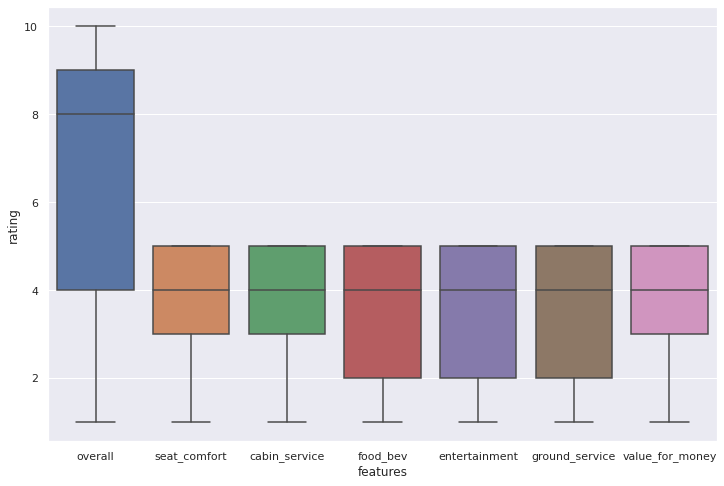

In [96]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xlabel("features")
plt.ylabel("rating")
plt.show()
     

##### What all outlier treatment techniques have you used and why did you use those techniques?

 There are no outliers in our data,so no outliers treatment is needed.

### 3. Categorical Encoding

In [98]:
# Encode your categorical columns

     

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [44]:
# Expand Contraction

#### 2. Lower Casing

In [45]:
# Lower Casing

#### 3. Removing Punctuations

In [46]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [48]:
# Remove Stopwords

In [49]:
# Remove White spaces

#### 6. Rephrase Text

In [50]:
# Rephrase Text

#### 7. Tokenization

In [51]:
# Tokenization

#### 8. Text Normalization

In [52]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [53]:
# POS Taging

#### 10. Text Vectorization

In [54]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [55]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [56]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [57]:
# Transform Your data

### 6. Data Scaling

In [58]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [59]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [60]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [61]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [62]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [67]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [70]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [71]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***